In [15]:
%matplotlib notebook
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [16]:
class KMeans:
    
    def __init__(self, data, k):
        
        self.k = k
        self.points = data
        self.centroids = self.points[np.random.choice(self.points.shape[0], self.k, replace=False),:]
        
        self.centroidsHist = []
        self.pointsHist = []

    def run(self):

        while True:
            
            self.centroidsHist.append(list(map(lambda c: list(c), self.centroids)))
            
            distances = np.sqrt(((self.points - self.centroids[:, np.newaxis])**2).sum(axis=2))
            labels = np.argmin(distances, axis=0)
            
            shot = []
            s = 0
            
            for i in range(self.k):
            
                pointsI = self.points[labels == i]
                shot.append(list(map(lambda p: list(p), pointsI)))

                newCentroid = np.mean(pointsI, axis=0)
                s += abs((newCentroid-self.centroids[i]).sum())
                self.centroids[i] = newCentroid
                
            self.pointsHist.append(shot)
            
            if s == 0:
                break
                

In [17]:
data = np.random.uniform(-5, 5, (6, 2))
k = 2
data

array([[ 0.75188763, -0.03049982],
       [ 4.14332639,  0.31776069],
       [ 0.30195443,  3.19576335],
       [-2.86116261, -4.06840549],
       [ 3.60687419,  1.42105196],
       [-1.39289695,  3.62217471]])

In [18]:
kMeans = KMeans(data, k)
kMeans.run()

<IPython.core.display.Javascript object>


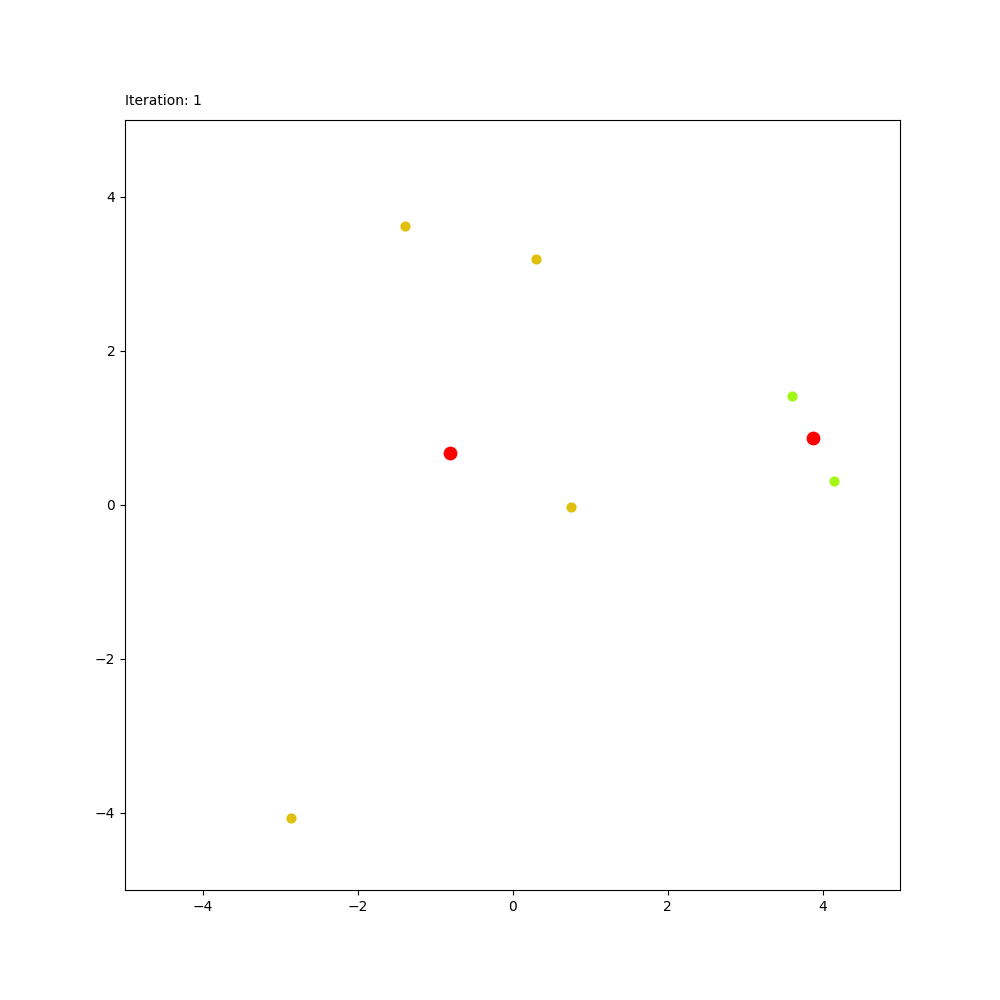

In [19]:
figA = plt.figure(figsize=(10, 10))
axA = figA.add_subplot()

plt.xlim(-5, 5)
plt.ylim(-5, 5)


scats = [axA.scatter([], [], s=40, c="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])) for i in range(k)]
scat = axA.scatter([], [], s=80, c='red')
temp = axA.text(-5, 5.2, '')
    
def animate(i):
    temp.set_text(f'Iteration: {i}')
    scat.set_offsets(kMeans.centroidsHist[i])
    for j in range(len(scats)):
        scats[j].set_offsets(kMeans.pointsHist[i][j])
    
anim1 = FuncAnimation(figA, animate, frames=len(kMeans.centroidsHist), interval=1000, repeat=False)